In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()  

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")

In [2]:
data_dir = '/Users/mmsub/Module5'
TRAIN = 'train'
TEST = 'test'

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transforms = {
    TRAIN: transforms.Compose([
        # Data augmentation is a good practice for the train set
        # Here, we randomly crop the image to 224x224 and
        # randomly flip it horizontally. 
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]),
        TEST: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
}

image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x), 
        transform=data_transforms[x]
    )
    for x in [TRAIN, TEST]
}

dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=8,
        shuffle=True, num_workers=4
    )
    for x in [TRAIN, TEST]
}

dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, TEST]}

for x in [TRAIN, TEST]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets[TRAIN].classes
print(image_datasets[TRAIN].classes)

Loaded 35397 images under train
Loaded 11818 images under test
Classes: 


['00008888', '00014292', '00132399', '00162412', '00183374', '00222338', '00258753', '00425911', '00430493', '00516789', '00517869', '00550951', '00582471', '00613312', '00697338', '00720828', '00799369', '00834595', '00888574', '00922449', '00947278', '00970010', '01020429', '01057260', '01072178', '01166262', '01259581', '01277449', '01326987', '01367739', '01421277', '01538342', '01556647', '01560749', '01604664', '01769890', '01773753', '01801462', '01852512', '01869860', '01902942', '01919159', '02011281', '02041339', '02046821', '02212743', '02220746', '02235877', '02277436', '02415602', '02428039', '02432486', '02434688', '02441621', '02532556', '02579833', '02709116', '02777491', '02813925', '02830217', '02875066', '03014666', '03043883', '03046793', '03050694', '03090822', '03256753', '03350504', '03379671', '03402821', '03403270', '03438781', '03441547', '03473314', '03537723', '03620044', '03625033', '03712203', '03744104', '03762742', '03779449', '03940830', '04085366', '04

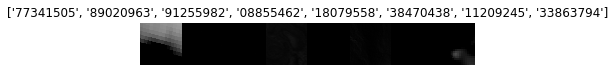

In [3]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(dataloaders[TRAIN]))
show_databatch(inputs, classes)

In [4]:
len(image_datasets[TRAIN].classes)

1863